In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings('ignore')

In [3]:
king= pd.read_excel("C:/Users/SUSHIL/Downloads/Airlines+Data.xlsx")

In [4]:
king

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
king.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:xlabel='Passengers'>

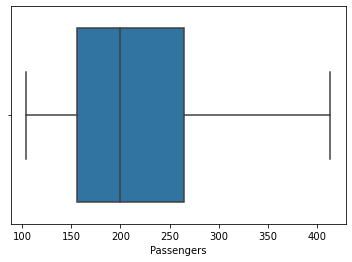

In [8]:
sns.boxplot("Passengers",data=king)

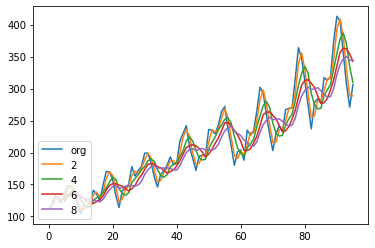

In [9]:
king.Passengers.plot(label="org")
for i in range(2,10,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

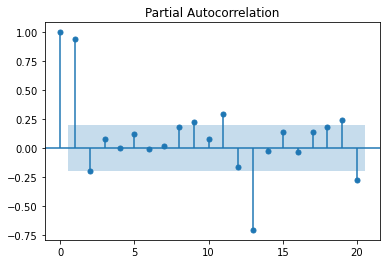

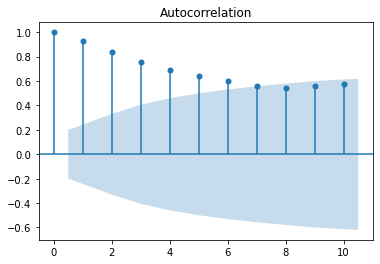

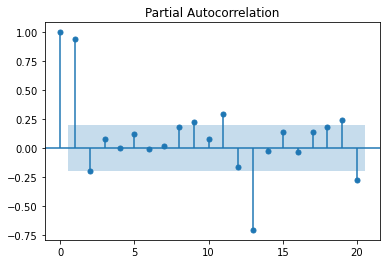

In [10]:
tsa_plots.plot_acf(king.Passengers,lags=10)
tsa_plots.plot_pacf(king.Passengers)

In [11]:
Train = df.head(48)
Test =df.tail(12)

In [12]:
def RMSE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [13]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.Passengers)

39.807494673483454

In [14]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.Passengers)

17.148238037227724

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_add_add,Test.Passengers)

30.606468319623573

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_mul_add,Test.Passengers)


20.971714598930934

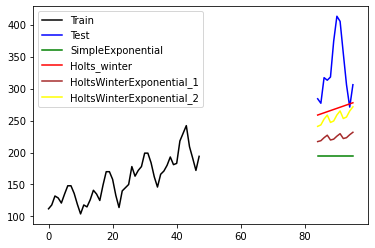

In [17]:
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')